In [1]:
import numpy as np, healpy as hp, pickle, curvedsky as cs, tqdm, sys
from matplotlib.pyplot import *
import local, tools_cmbalm
import binning, plottools as pl

/global/homes/t/toshiyan/Work/Lib/actlib/actsims/actsims/noise.py:9: UserWarning: No pyfftw found. Using much slower numpy fft engine.
  if 'fftw' not in pfft.engine: warnings.warn("No pyfftw found. Using much slower numpy fft engine.")


In [2]:
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/actsims/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/soapack/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/orphics/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/tilec/")
from pixell import enmap
from soapack import interfaces

In [3]:
#qids = ['boss_d02','boss_02']
#qids = ['s16_d01','s16_d02']
qids = ['boss_d01','boss_01','boss_d02','boss_02','boss_d03','boss_03','boss_d04','boss_04','s16_d01','s16_d02','s16_d03']
kwargs = {'snmin':0,'snmax':10}

In [4]:
aobj = {q: local.init_analysis_params(qid=q,**kwargs) for q in qids}

In [9]:
mask_iv = tools_cmbalm.load_mask('boss_d01')
mask_hp = enmap.to_healpix(mask_iv[0],nside=128)

boss_d01 0.049958546


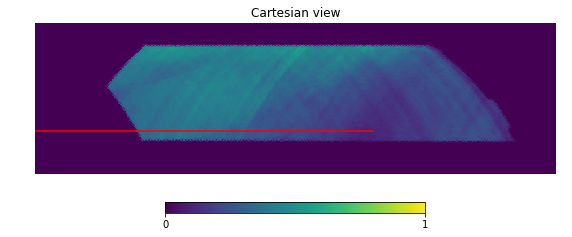

boss_01 0.047553558


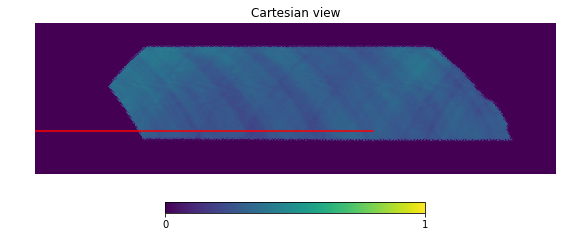

boss_d02 0.049995024


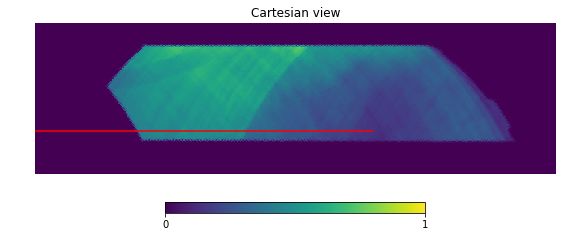

boss_02 0.04752581


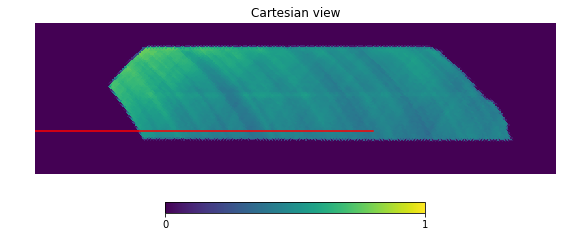

boss_d03 0.04990104


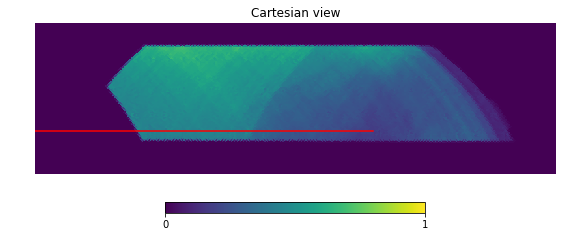

boss_03 0.04754335


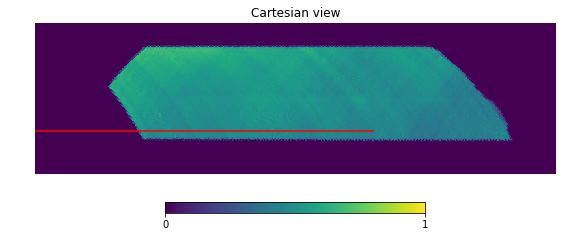

boss_d04 0.050076302


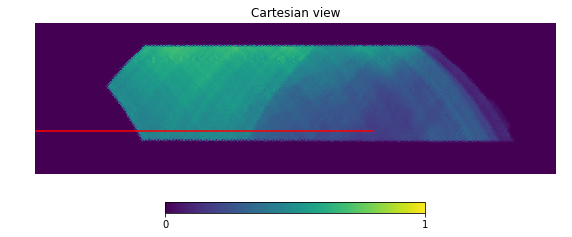

boss_04 0.04729576


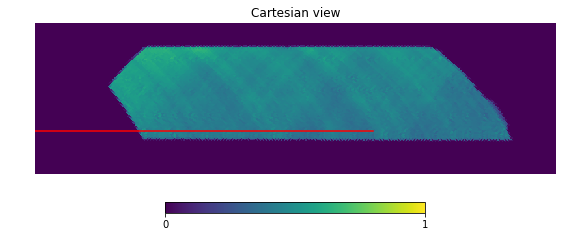

s16_d01 0.021632373


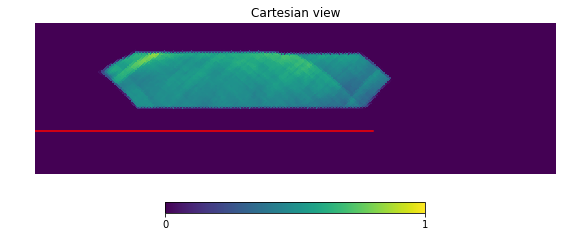

s16_d02 0.021990305


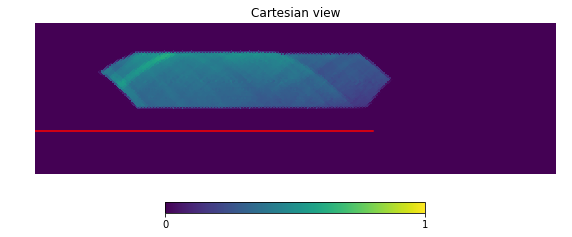

s16_d03 0.022108817


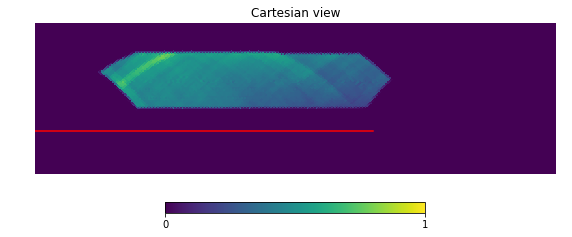

In [29]:
for qid in qids:
    mask_iv = tools_cmbalm.load_mask(qid)
    mask_hp = enmap.to_healpix(mask_iv[0],nside=128)
    print(qid,np.average(mask_hp/(mask_hp+1e-30)))
    #hp.mollview(mask_hp)
    hp.cartview(mask_hp,lonra=[-220,-100],latra=[-10,25],min=0,max=1)
    equateur_lon = np.linspace(-220.,100.,100)
    equateur_lat = np.linspace(0.,0.,100)
    hp.projplot(equateur_lon, equateur_lat, 'r-', lonlat=True)
    #imshow(mask_iv[0])
    show()